In [1]:
# loading the data -> data visualization -> train test split
# -> model building -> training -> evaluation -> streamlit application

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df  = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/spam.tsv', sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [5]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [6]:
# Getting the dimensions (number of rows and columns) of the DataFrame
df.shape

(5572, 4)

In [7]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [7]:
#Data Balancing

In [8]:
#creating a new DataFrame ham that contains only the rows where the 'label' column is equal to 'ham'.
ham = df[df['label']=='ham']
ham.shape

(4825, 4)

In [9]:
#creating a new DataFrame spam that contains only the rows where the 'label' column is equal to 'spam'.
spam = df[df['label']=='spam']
spam.shape

(747, 4)

In [10]:
ham = ham.sample(spam.shape[0])

In [11]:
ham.shape

(747, 4)

In [12]:
data = pd.concat([ham, spam], axis=0, ignore_index=True)

In [13]:
data.shape

(1494, 4)

In [14]:
data.sample(5)

,label,message,length,punct
1410,spam,Got what it takes 2 take part in the WRC Rally...,159,10
818,spam,+123 Congratulations - in this week's competit...,169,7
1396,spam,"New Mobiles from 2004, MUST GO! Txt: NOKIA to ...",152,13
746,ham,HEY BABE! FAR 2 SPUN-OUT 2 SPK AT DA MO... DEA...,159,10
1472,spam,You have 1 new message. Call 0207-083-6089,42,3


In [15]:
#Data Analysis

In [15]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = (10, 4)
plt.style.use('ggplot')

In [16]:
ham.columns

Index(['label', 'message', 'length', 'punct'], dtype='object')

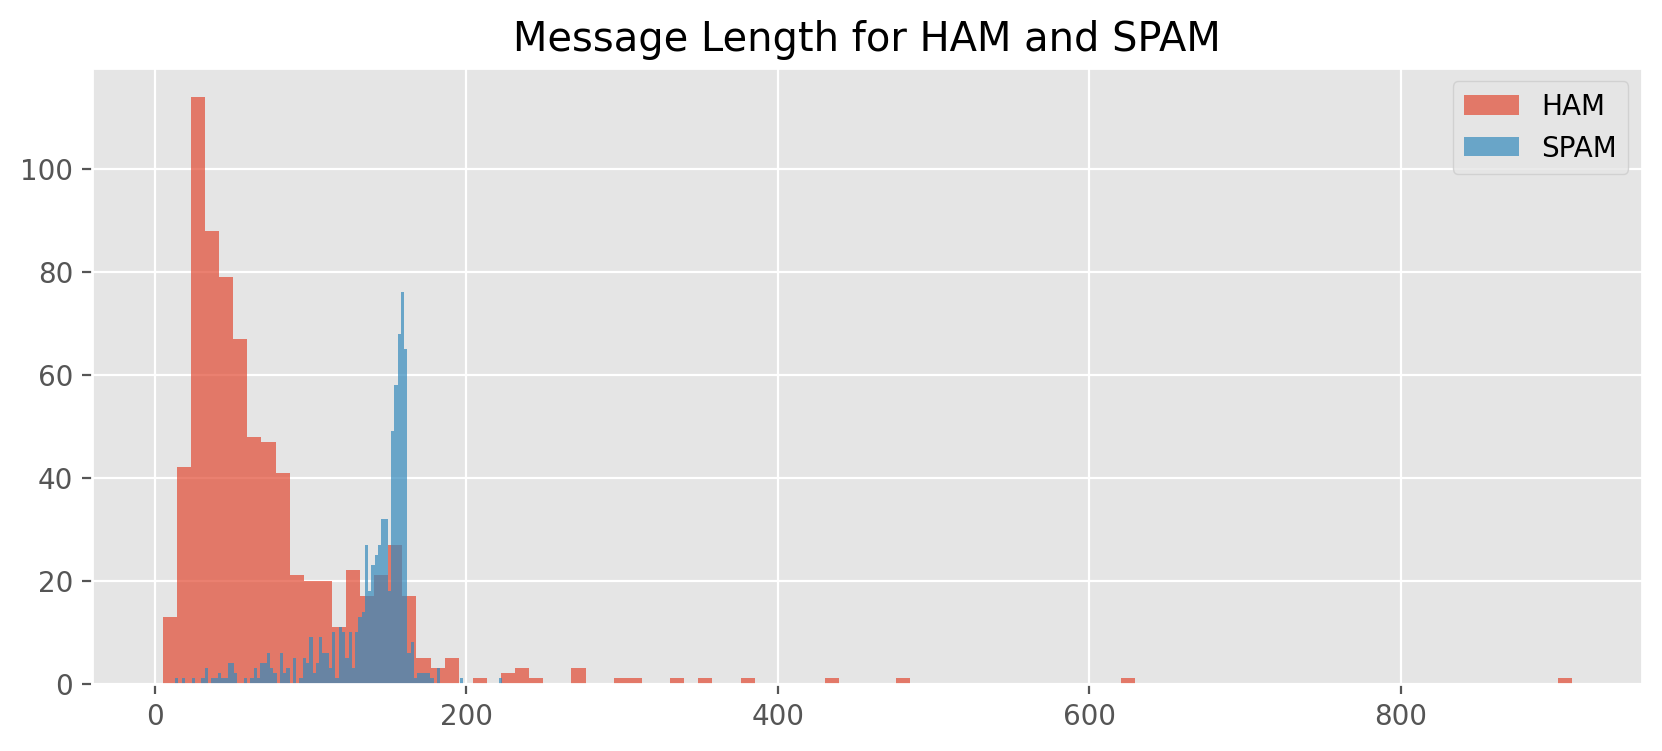

In [18]:
plt.hist(ham['length'], bins=100, alpha=0.7, label='HAM')
plt.hist(spam['length'], bins=100, alpha=0.7, label='SPAM')
plt.title('Message Length for HAM and SPAM')
plt.legend()
plt.show()

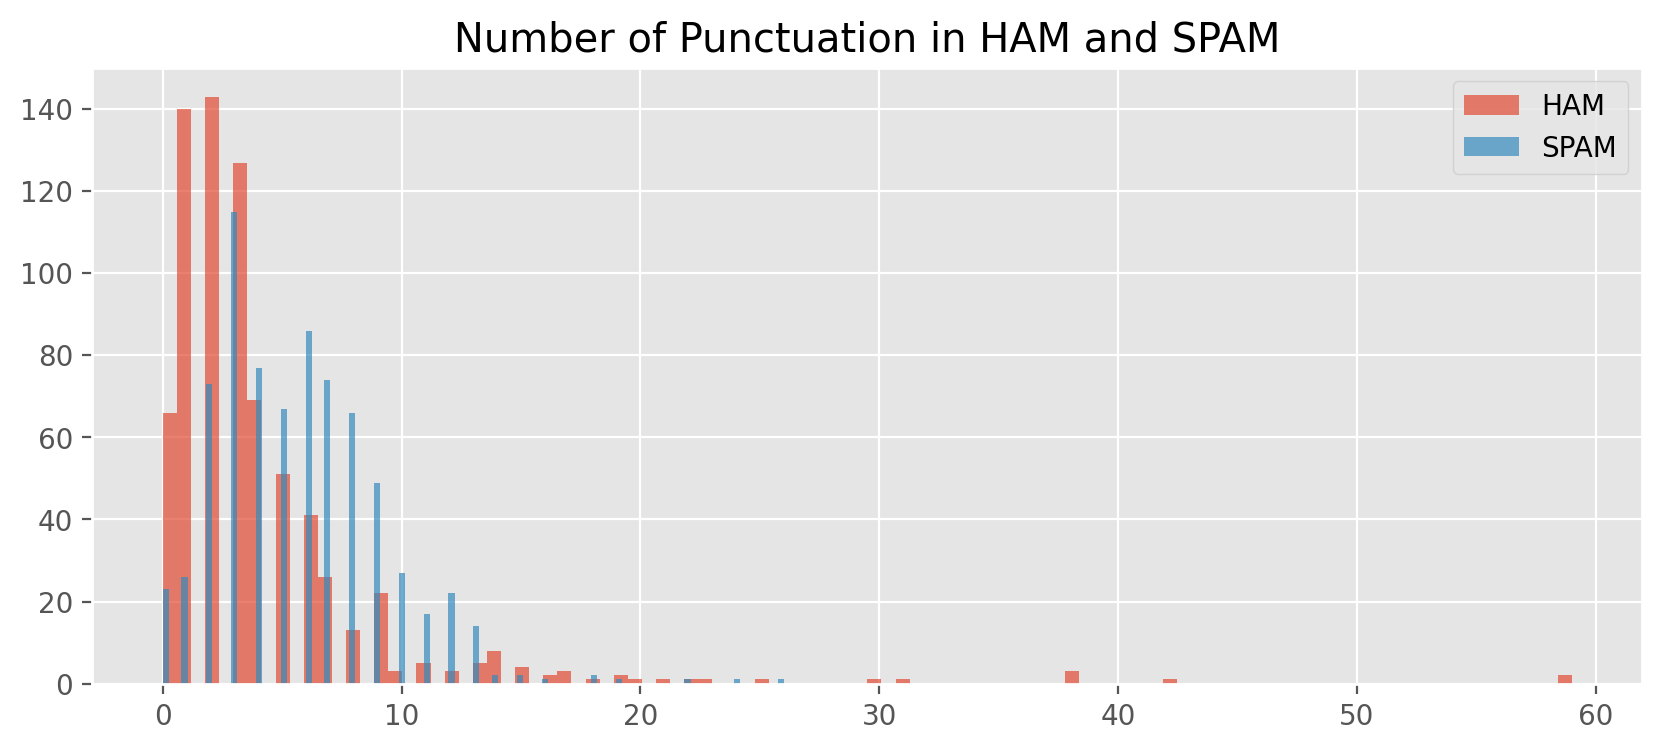

In [17]:
plt.hist(ham['punct'], bins=100, alpha=0.7, label='HAM')
plt.hist(spam['punct'], bins=100, alpha=0.7, label='SPAM')
plt.title('Number of Punctuation in HAM and SPAM')
plt.legend()
plt.show()

In [20]:
#Data Preparation for Training

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'],
                                                   test_size=0.2, random_state=0,
                                                   shuffle=True, stratify=data['label'])

X_train.shape, X_test.shape

((1195,), (299,))

In [20]:
# model Building
clf = Pipeline([('tfidf', TfidfVectorizer()), 
                ('rfc', RandomForestClassifier(n_estimators=100, n_jobs=-1))])

clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('rfc', RandomForestClassifier(n_jobs=-1))])

In [21]:
y_pred = clf.predict(X_test)

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.91      1.00      0.95       150
        spam       1.00      0.90      0.95       149

    accuracy                           0.95       299
   macro avg       0.95      0.95      0.95       299
weighted avg       0.95      0.95      0.95       299



In [23]:
clf.predict(['you have won lottery ticket worth $1000, please click here to claim',
            'hi, how are you doing today?'])

array(['spam', 'ham'], dtype=object)

In [24]:
clf.classes_

array(['ham', 'spam'], dtype=object)

In [28]:
#Save and Load Model

In [25]:
import pickle

pickle.dump(clf, open('model.pkl', 'wb'))

In [26]:
model = pickle.load(open('model.pkl', 'rb'))

In [27]:
model.predict(['you have won lottery ticket worth $1000, please click here to claim',
            'hi, how are you doing today?'])

array(['spam', 'ham'], dtype=object)